In [1]:
import xarray as xr
import numpy as np
import xmitgcm
from matplotlib import pyplot as plt
import os
from glob import glob
%matplotlib inline

In [2]:
import dask
print(dask.__version__)
print(xr.__version__)

0.16.0
0.10.0


In [3]:
ddir = '/swot/SUM01/LLC/llc_4320_agulhas/'
all_files = glob(os.path.join(ddir, 'llc_4320_agulhas.0*.nc'))
print(len(all_files))
all_files[-1]

1752


'/swot/SUM01/LLC/llc_4320_agulhas/llc_4320_agulhas.0000047808.nc'

In [4]:
ds = xr.open_mfdataset(all_files[:10], decode_cf=False, autoclose=True)
ds = ds.set_coords(['iter', 'face'])

In [5]:
grid = xr.open_dataset(ddir + 'llc_4320_agulhas_grid.nc').chunk()
ds = xr.merge([grid, ds])

In [6]:
ds

<xarray.Dataset>
Dimensions:   (i: 2160, i_g: 2160, j: 2160, j_g: 2160, k: 90, k_l: 90, k_p1: 91, k_u: 90, time: 10)
Coordinates:
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g       (j_g) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...
  * k_u       (k_u) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * k_p1      (k_p1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i         (i) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
  * j         (j) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * k_l       (k_l) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g       (i_g) int64 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 ...
    face      (time) int64 1 1 1 1 1 1 1 1 1 1
    YC        (j, i) float32 dask.array<shape=(2160, 2160), chunksize=(2160, 2160)>
    YG        (j_g, i_g) float32 dask.array<shape=(2160, 2160), chunksize=(2160, 2160)>
    XC        

In [7]:
sst = ds.Theta[0,0].where(ds.hFacC[0]>0).load()

In [10]:
sss = ds.Salt[0,0].where(ds.hFacC[0]>0).load()

In [7]:
eta = ds.Eta[0].where(ds.hFacC[0]>0).load()

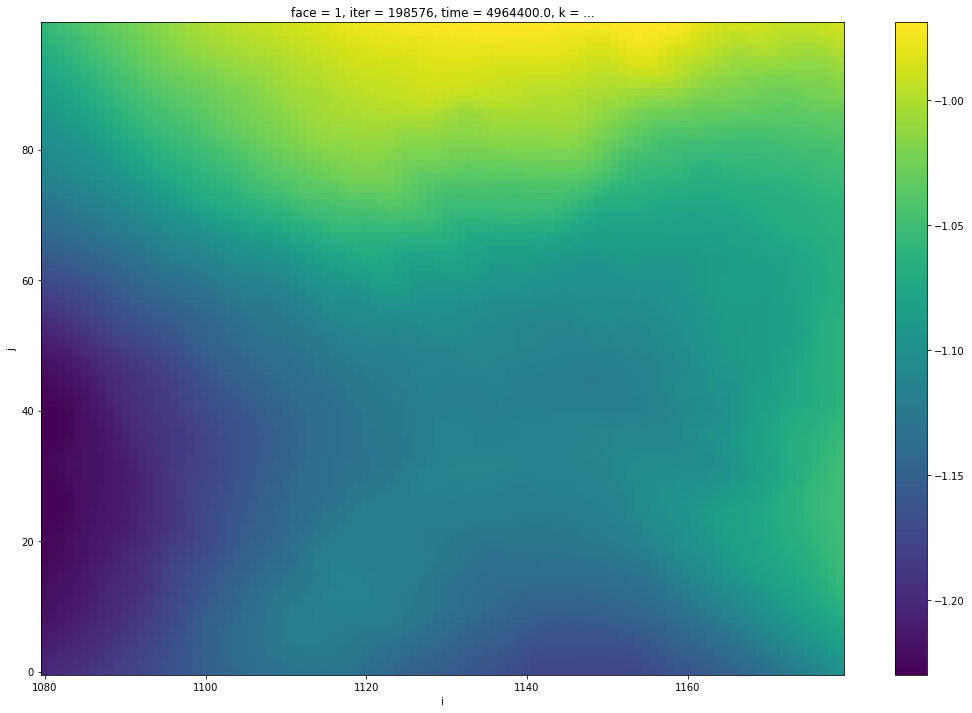

In [8]:
plt.figure(figsize=(18,12))
eta[:100,:100].plot()

In [9]:
u = ds.U[9,0].where(ds.hFacW[0]>0).load()

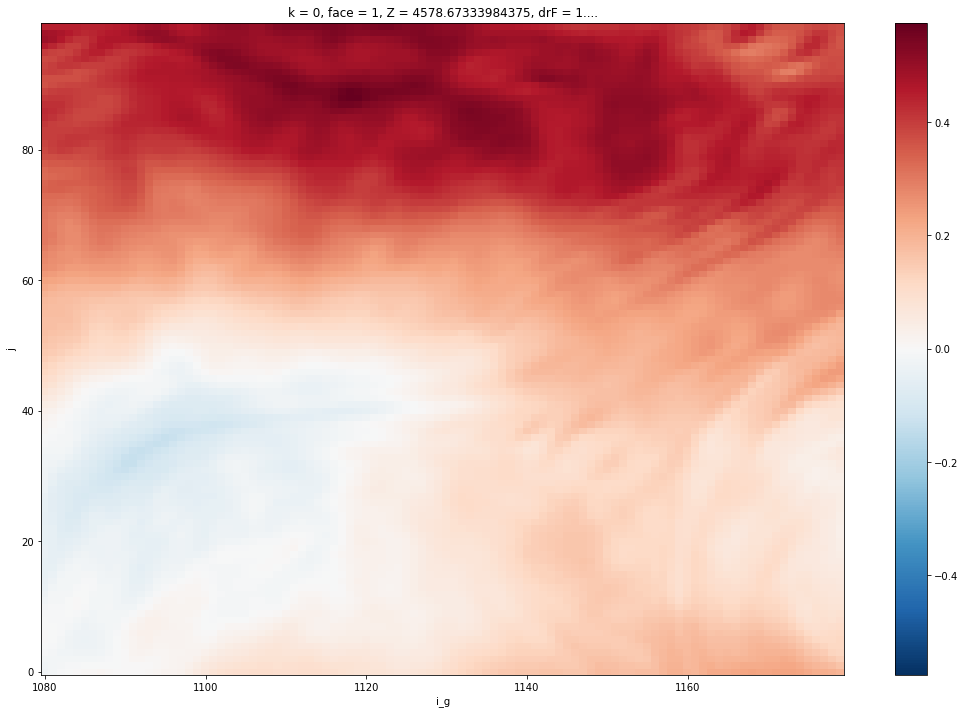

In [11]:
plt.figure(figsize=(18,12))
u[:100, :100].plot()

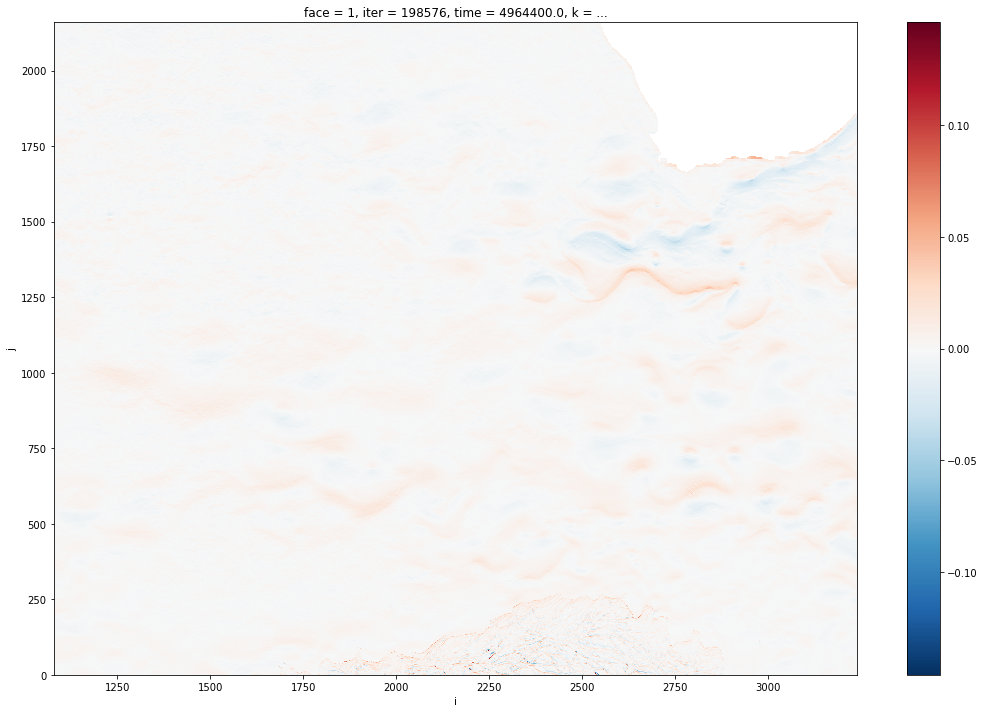

In [18]:
plt.figure(figsize=(18,12))
eta.diff(dim='j').plot()